In [2]:
import threading
import time

def worker(name, delay):
    """Thread worker function"""
    print(f'{name} thread started')
    time.sleep(delay)
    print(f'{name} thread finished')

# Create two threads with different arguments
t1 = threading.Thread(target=worker, args=('Thread 1', 2))
t2 = threading.Thread(target=worker, args=('Thread 2', 5))

# Start the threads
t1.start()
t2.start()

# Wait for both threads to finish
t1.join()
t2.join()


Thread 1 thread startedThread 2 thread started

Thread 1 thread finished
Thread 2 thread finished


In [3]:
import threading

# Create an event object
event = threading.Event()

# Define a function that will be executed in a separate thread
def worker():
    print("Worker thread started")
    event.wait() # Wait for the event to be set
    print("Worker thread finished")

# Create a new thread and start it
thread = threading.Thread(target=worker)
thread.start()

# Do some work in the main thread
print("Main thread doing some work...")

# Set the event, signaling the worker thread to continue
event.set()

# Wait for the worker thread to finish
thread.join()


Worker thread startedMain thread doing some work...

Worker thread finished


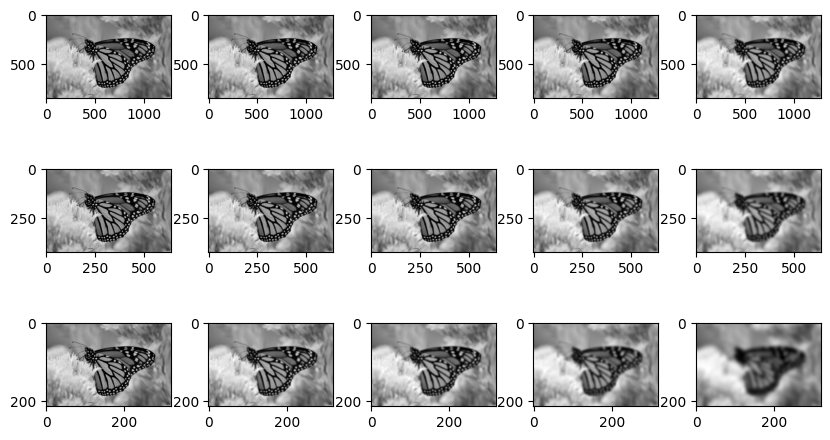

In [122]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2 as cv

img_originala = cv.imread("resources/butterfly.jpg")
img_originala = cv.cvtColor(img_originala, cv.COLOR_BGR2GRAY)
# Apply Gaussian filters to the images
fix, axs = plt.subplots(3, 5, figsize=(10, 6))
for i in range(3):
    img_blur = img_originala
    sigma = 1.0  # Standard deviation of the first Gaussian filter
    for j in range(5):
        axs[i][j].imshow(img_blur, cmap='gray',)
        img_blur = gaussian_filter(img_blur, sigma)
        sigma += j

    img_originala = cv.resize(img_originala, (0, 0), fx=0.5, fy=0.5)

plt.subplots_adjust(hspace=0, wspace=0.3)
plt.show()

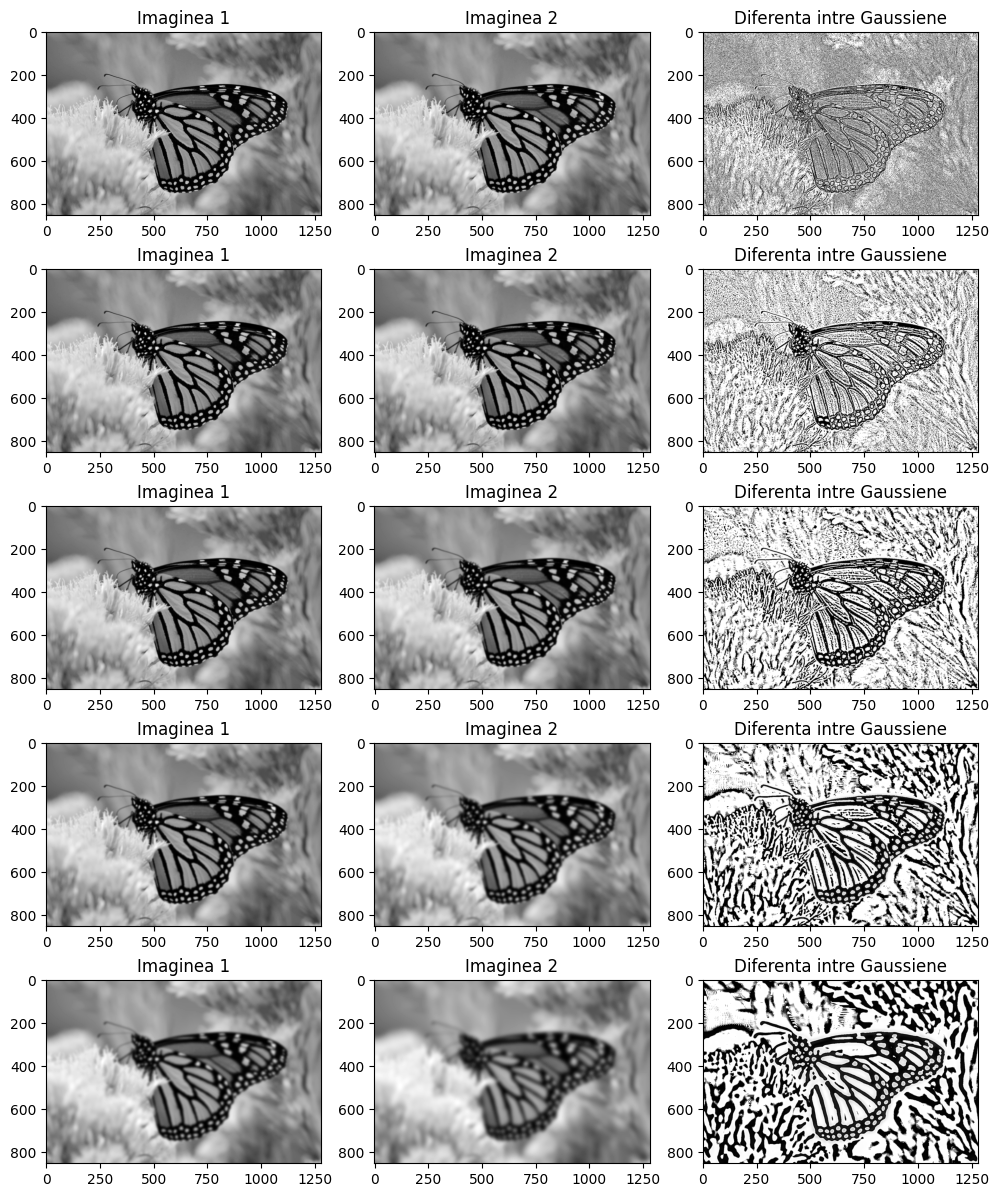

In [123]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2 as cv
img_originala = cv.imread("resources/butterfly.jpg")
img_originala = cv.cvtColor(img_originala, cv.COLOR_BGR2GRAY)
sigma = 1  # Standard deviation of the first Gaussian filter

fix, axs = plt.subplots(5, 3, figsize=(10, 12))

for i in range(5):
    axs[i][0].imshow(img_originala, cmap='gray', )
    axs[i][0].set_title("Imaginea 1")

    img_blur = gaussian_filter(img_originala, sigma)

    axs[i][1].imshow(img_blur, cmap='gray')
    axs[i][1].set_title("Imaginea 2")

    dog = img_blur - img_originala

    axs[i][2].imshow(dog, cmap='gray')
    axs[i][2].set_title("Diferenta intre Gaussiene")

    img_originala = img_blur
    sigma += i


plt.tight_layout()
plt.show()
